# Percent of Courses That are NROable by Department

This notebook shows the percentage of courses that are NROable by department. \
Data analyzed is from the most recent semester. \
Each department is represented by a bar, and the percentage of NROable courses is shown on the y-axis. \
The department average is also shown as a horizontal line.

In [1]:
%pip install -qqq matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
from utils.get_recent_sem import * 

courses = get_recent_sem("courses")

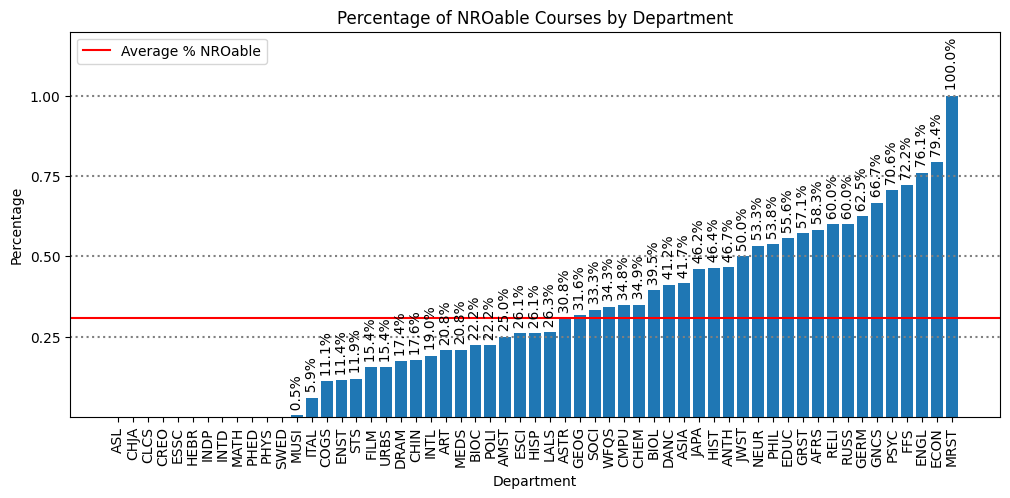

In [3]:
#Format: {dept: [nro_count, total_count], ...}
dept_course_info = {} 

for index, course in courses.iterrows():
    dept = course["dept"]
    
    # Uncomment to only look at n-level courses
    # This allows for checking of NRO-able courses at, for example, the 100-level only
    # n = 100
    # course_ID = course["courseID"]
    # course_num = course_ID[len(dept)+1:len(dept)+1+3]
    # course_level = int(course_num[0])*100 #e.g. 100, 200
    # if course_level != n: 
    #     continue
    
    # Add dept to dict if it doesn't exist
    if dept not in dept_course_info:
        dept_course_info[dept] = [0, 0]
    
    if course["gm"] == "NR":
        dept_course_info[dept][0] += 1
        
    dept_course_info[dept][1] += 1
    
dept_nro_percent = {dept: dept_course_info[dept][0] / dept_course_info[dept][1] for dept in dept_course_info}

#Make bar chart wider
plt.figure(figsize=(12, 5))
# Add titles (must be done after setting figure size)
plt.title("Percentage of NROable Courses by Department")
plt.xlabel("Department")
plt.ylabel("Percentage")
# Rotate x-axis labels
plt.xticks(rotation=90)

# Set y-axis ticks
yticks = [0.25, 0.5, 0.75, 1]
plt.yticks(ticks=yticks)
for y in yticks:
    plt.axhline(y=y, color="gray", linestyle=":")

# Sort departments by percentage of NROable courses
data = dict(sorted(dept_nro_percent.items(), key=lambda x: x[1]))
plt.bar(data.keys(), data.values())

average = sum(data.values()) / len(data.values())
plt.axhline(y=average, color="red", linestyle="-", label="Average % NROable")
leg = plt.legend(loc='upper left')

#Show percentage on top of each bar
for key, value in data.items():
    # but only if the percentage is not 0
    if value > 0:
        # Add spacing to make text more readable
        plt.text(key, value, f"  {round(value*100, 1)}%", ha="center", rotation=90, fontsize=10)
        
#Add horizontal space for text labels that are high (e.g. 100%)
plt.margins(y=0.2)